# Eurocode 8 - Seismic Action - Spectra

In [1]:
from streng.codes.eurocodes.ec8.cls.seismic_action.spectra import SpectraEc8
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
print(SpectraEc8.__doc__)

Eurocode 8 response spectra

    .. note::
        If αgR values are given in g, displacements and velocities should be multiplied with 9.81

    .. uml::

        class SpectraEc8 {
        .. attributes ..
        + αgR (float)
        + γI (float)
        + ground_type (str)
        + spectrum_type (int)
        + η (float)
        + q (float)
        + β (float)
        .. properties ..
        + dg()
        + getAllSpectra0to4()
        .. methods ..
        + Se(T) (float)
        + SDe(T) (float)
        + Sd(T) (float)
        }

    Attributes:
        αgR (float): reference peak ground acceleration on type A ground
        γI (float): importance factor
        ground_type (str): Ground type (A, B, C, D or E)
        spectrum_type (int): Spectrum type 1 or 2
        η (float): value of the damping correction factor
        q (float): behaviour factor
        β (float): lower bound factor for the horizontal design spectrum. Recommended value for β is 0.2

    


In [3]:
print(SpectraEc8.Se.__doc__)


        Args:
            T(float): Period

        Returns:
            float: The elastic acceleration response spectrum

        


## Δεδομένα φάσματος

In [4]:
specEC8 = SpectraEc8(αgR=0.24,
                     γI=1.2,
                     ground_type = 'D',
                     spectrum_type = 1,
                     η=1.0,
                     q=3.9,
                     β=0.2)

## Elastic spectrum

Δεν πειράζει αν βάλω τιμή στο q. Δεν τη λαμβάνει υπόψη.

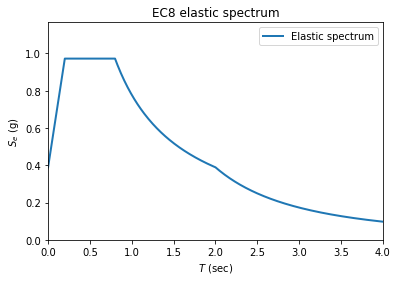

In [5]:
x = np.linspace(1e-10, 4, 401) # Δε βάζω από το 0 για να μην προκύπτει μήνυμα λάθους όταν διαιρεί με το T
y = specEC8.Se(x)

plt.plot(x, y, lw=2, label='Elastic spectrum')
plt.axis([0, 4, 0, 1.2 * y.max()])
plt.ylabel('$S_{e}$ (g)') 
plt.xlabel('$T$ (sec)') #'μθpl'  
plt.title('EC8 elastic spectrum')
plt.legend()
plt.show()

## Elastic displacement spectrum

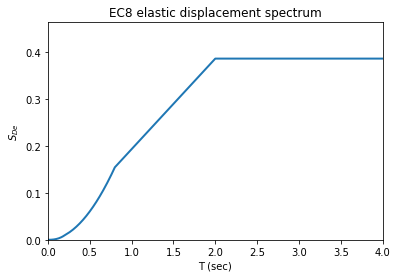

In [6]:
y = specEC8.SDe(x)*9.81 
plt.plot(x, y, lw=2)
plt.axis([0, 4, 0, 1.2 * y.max()])
plt.ylabel('$S_{De}$') 
plt.xlabel('T (sec)') #'μθpl'  
plt.title('EC8 elastic displacement spectrum')
plt.show()

## Design ground displacement

In [7]:
print(f'Design ground displacement, dg={9.81*specEC8.dg():.3f}m')

TypeError: 'float' object is not callable

## Design spectrum

In [ ]:
y = specEC8.Sd(x)

plt.plot(x, y, lw=2)
plt.axis([0, 4, 0, 1.2 * y.max()])
plt.ylabel('$S_{d}$ (g)') 
plt.xlabel('$T$ (sec)') #'μθpl'  
plt.title('EC8 design spectrum')
plt.show()